In [6]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Department Employee  Jan Productivity  Feb Productivity  Mar Productivity  \
0         HR    Alice                78                80                85   
1         HR      Bob                85                87                88   
2         IT  Charlie                90                92                94   
3         IT    David                88                89                90   
4    Finance      Eve                76                78                79   
5    Finance    Frank                80                83                85   

   Years of Experience  
0                    3  
1                    5  
2                    8  
3                    6  
4                    4  
5                    7  
                     Jan Productivity  Feb Productivity  Mar Productivity  \
Department Employee                                                         
HR         Alice                   78                80                85   
           Bob                     85   

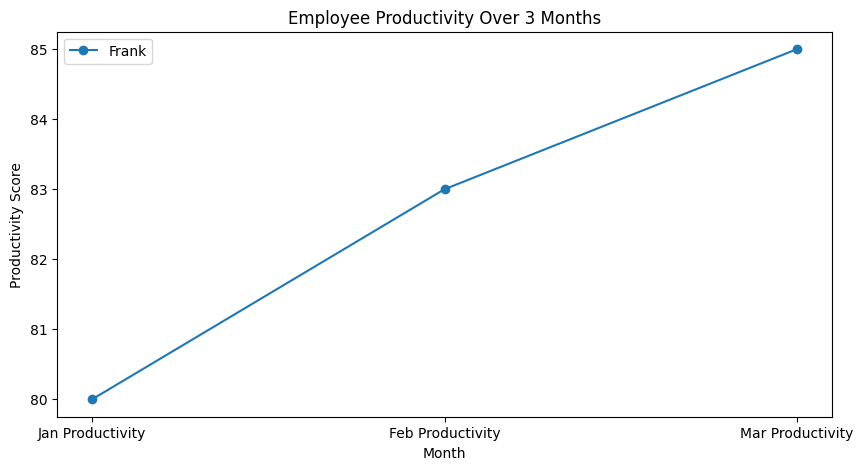

In [7]:
#Step 1: Import Necessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#Step 2: Create a Sample Dataset
data = { 
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance'], 
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'], 
    'Jan Productivity': [78, 85, 90, 88, 76, 80], 
    'Feb Productivity': [80, 87, 92, 89, 78, 83], 
    'Mar Productivity': [85, 88, 94, 90, 79, 85], 
    'Years of Experience': [3, 5, 8, 6, 4, 7] 
    } 
df = pd.DataFrame(data) 
print(df)

#Step 3: Apply MultiIndexing (Hierarchical Indexing)
df.set_index(['Department', 'Employee'], inplace=True)
print(df)

#Step 4: Reshaping Data Using melt()
df_reset = df.reset_index() 
df_melted = df_reset.melt(id_vars=['Department', 'Employee', 'Years of Experience'], 
                                                      var_name='Month', value_name='Productivity')
print(df_melted)

#Step 5: Using Window Functions (rolling())
df_melted['Rolling Avg'] = df_melted.groupby('Employee')['Productivity'].rolling(window=2).mean().reset_index(0, drop=True) 
print(df_melted)

#Step 6: Performance Optimization Vectorization vs Loops
# Using a Loop (Slower) 
df_melted['Experience Bonus'] = 0 
for i in range(len(df_melted)): 
    df_melted.loc[i, 'Experience Bonus'] = df_melted.loc[i, 'Years of Experience'] * 100 
    # Using Apply (Optimized) 
df_melted['Experience Bonus'] = df_melted['Years of Experience'].apply(lambda x: x * 100) 
print(df_melted)
#Using apply() instead of a loop speeds up calculations.
#Step 7: Data Visualization with Matplotlib
plt.figure(figsize=(10,5))
for emp in df_melted['Employee'].unique(): 
    subset = df_melted[df_melted['Employee'] == emp]
plt.plot(subset['Month'], subset['Productivity'], marker='o', label=emp)
plt.title("Employee Productivity Over 3 Months") 
plt.xlabel("Month")
plt.ylabel("Productivity Score") 
plt.legend() 
plt.show()